<a href="https://colab.research.google.com/github/estebanlecalvez/training-datamining-mds/blob/master/20200420_10_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Notebook d'exemle pour classer les pays les plus peuplés**

**Step 1: import library**

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import io
import numpy as np
from cif import cif


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Step 2: Collect & read Data**

In [0]:
response = requests.get('https://datahub.io/JohnSnowLabs/population-figures-by-country/r/population-figures-by-country-csv.csv')

file_object = io.StringIO(response.content.decode('utf-8'))

data = pd.read_csv(file_object, usecols=["Country", "Year_1960", "Year_2016"])


**Step 3: Limit data to asked constraints**

In [0]:
data = data.sort_values(by='Year_2016', ascending=False)
data = data.head(10)
data

,Country,Year_1960,Year_2016
256,World,3.034193e+09,7.442136e+09
101,IDA & IBRD total,2.301898e+09,6.271593e+09
137,Low & middle income,2.275439e+09,6.247923e+09
153,Middle income,2.124914e+09,5.592833e+09
100,IBRD only,1.919408e+09,4.697247e+09
60,Early-demographic dividend,9.792269e+08,3.170542e+09
136,Lower middle income,9.555304e+08,3.012924e+09
246,Upper middle income,1.169383e+09,2.579910e+09
61,East Asia & Pacific,1.042017e+09,2.296786e+09
139,Late-demographic dividend,1.099314e+09,2.262710e+09


**Step 4 : Make the bar horizontal barchart !**

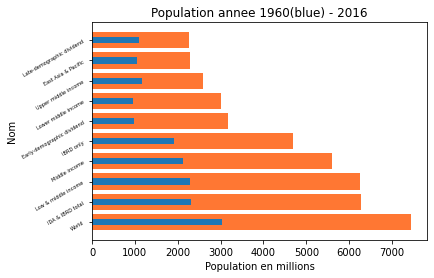

In [0]:
index = np.arange(len(data))

plt.barh(index,width=data['Year_2016']/1000000,data=data,color="#FF7733")
plt.yticks(index,data['Country'],fontsize=5,rotation=30)
plt.barh(index,width=data['Year_1960']/1000000,data=data,height=0.3)
plt.ylabel('Nom')
plt.xlabel('Population en millions')
plt.yticks(index,data['Country'],fontsize=5,rotation=30)
plt.title('Population annee 1960(blue) - 2016')
plt.show()



_____________________________________________________________

**Second Try**

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import io
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from pandas import DataFrame
import plotly.graph_objects as go

**On va chercher le fichier depuis GDrive**

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
downloaded = drive.CreateFile({'id':"1FjX4NTIq1z3zS9vCdAdpddtj9mKa0wIW"})   # replace the id with id of file you want to access
downloaded.GetContentFile('POP_PROJ_20042020112713800.csv')

**On stock la data dans une variable**

In [0]:
data = pd.read_csv("POP_PROJ_20042020112713800.csv", usecols=["Country", "Time", "Value"])

**On fait la tambouille**

In [59]:
# Utilisation de Plotly, c'est bo!
firstOccur = []
secondOccur = []
firstYear = 2000
secondYear = 2030
def tambouille_first(number1):
  first = []
  for index, row in data.iterrows():
    if(row["Time"] == number1):
      first.append(row)

  first = DataFrame(first)
  first = first.sort_values(by ="Value",ascending=True)
  first = first.tail(10)
  return first

def tambouille_second(number2):
  second = []
  for index, row in data.iterrows():
    if(row["Time"] == number2):
      second.append(row)

  second = DataFrame(second)
  second =second.sort_values(by ="Value",ascending=True)
  second = second.tail(10)
  return second

firstOccur = tambouille_first(firstYear)
secondOccur = tambouille_second(secondYear)

firstOccur


,Country,Time,Value
2837,Turkey,2000,64268.75
887,Germany,2000,82211.51
1816,Mexico,2000,100895.80
1503,Japan,2000,126927.00
4483,Russia,2000,146597.00
3150,Brazil,2000,171279.90
3877,Indonesia,2000,208938.70
3039,United States,2000,282162.40
3766,India,2000,1042262.00
3453,China (People's Republic of),2000,1280429.00


**On crée le schema**

In [66]:

fig = go.Figure(data=[
  go.Bar(name=str(firstYear), y=firstOccur["Country"], x=firstOccur["Value"],orientation='h'),
  go.Bar(name=str(secondYear), y=secondOccur["Country"], x=secondOccur["Value"],orientation='h'),
])

# years_dropdown=list([
#                 dict(
#                     args=["Time", 1960],
#                     label="1960",
#                     method="update",
                     
#                 ),
#               dict(
#                     args=[firstYear, 1965],
#                     label="1965",
#                     method="update"
#                 ),
#                  dict(
#                     args=[firstYear, 1970],
#                     label="1970",
#                     method="update"
#                 ),
#                  dict(
#                     args=[firstYear, 1975],
#                     label="1975",
#                     method="update"
#                 ),
#                  dict(
#                     args=[firstYear, 1980],
#                     label="1980",
#                     method="update"
#                 ),
#                  dict(
#                     args=[firstYear,1985],
#                     label="1985",
#                     method="update"
#                 ),
#                  dict(
#                     args=[firstYear, 1990],
#                     label="1990",
#                     method="update"
#                 ),
#                  dict(
#                     args=[firstYear, 1995],
#                     label="1995",
#                     method="update"
#                 ),
#             ])
# # Add dropdown
# fig.update_layout(
#     updatemenus=[
#         dict(
#             buttons=years_dropdown,
#             direction="down",
#             pad={"r": 10, "t": 10},
#             showactive=True,
#             x=0.07,
#             xanchor="left",
#             y=1.11,
#             yanchor="top"
#         ),
#         dict(
#             buttons=years_dropdown,
#             direction="down",
#             pad={"r": 10, "t": 10},
#             showactive=True,
#             x=0.20,
#             xanchor="left",
#             y=1.11,
#             yanchor="top"
#         ),
#     ]
# )
# # Change the bar mode
# fig.update_layout(
#     barmode='group',annotations=[
#         dict(text="Year group 1", x=0, xref="paper", y=1.06, yref="paper",
#             align="left", showarrow=False),
#         dict(text="Year Group 2", x=0.13, xref="paper", y=1.07,
#             yref="paper", showarrow=False),
#         dict(text="Source: at : From The World Bank", x=1, xref="paper", y=-0.1,
#             yref="paper", showarrow=False),


#     ])

fig.show()